## Get the Data
Get fresh data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

## Import Statements

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Data Exploration

**Challenge**: <br>
Read the .csv file and store it in a Pandas dataframe

In [24]:
column_names = ['DATE', 'TAG', 'POSTS']
df = pd.read_csv('QueryResults.csv', names=column_names, header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
2042,2020-11-01 00:00:00,c++,4897
2043,2020-11-01 00:00:00,php,5738
2044,2020-11-01 00:00:00,ruby,592
2045,2020-11-01 00:00:00,r,5658


**Challenge**: <br>
Examine the first 5 rows, and the last 5 rows of the dataframe.

In [25]:
df.head(5)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** <br>
Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [26]:
df.tail(5)

,DATE,TAG,POSTS
2042,2020-11-01 00:00:00,c++,4897
2043,2020-11-01 00:00:00,php,5738
2044,2020-11-01 00:00:00,ruby,592
2045,2020-11-01 00:00:00,r,5658
2046,2020-11-01 00:00:00,swift,2665


**Challenge**: <br>
Count the number of entries in each column of the dataframe

In [27]:
print(df.shape)  # Tells us number of rows and columns of the whole table
print(df.count())  # Tells us the number of entries in each column

(2047, 3)
DATE     2047
TAG      2047
POSTS    2047
dtype: int64


**Challenge**: <br>
Calculate the total number of post per language. <br>
Which Programming language has had the highest total number of posts of all time?

In [28]:
df.groupby('TAG').sum()[['POSTS']].sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2123761
java,1730836
python,1588454
c#,1447745
php,1378609
c++,701016
r,375924
c,344982
swift,282911


Some languages are older (e.g., C) and other languages are newer
(e.g., Swift). The dataset starts in September 2008.

**Challenge**: <br>
How many months of data exist per language? Which language had
the fewest months with an entry?


In [29]:
df.groupby('TAG').count()[['DATE']].sort_values('DATE', ascending=False)

,DATE
TAG,
c#,149
assembly,148
c,148
c++,148
delphi,148
java,148
javascript,148
perl,148
php,148


## Data Cleaning
Let's fix the date format to make it more readable. <br>
We need to use Pandas to change format from a string of "2008-07-01 00:00:00"
to a datetime object with the format of "2008-07-01"

In [30]:
df['DATE'] = pd.to_datetime(arg=df['DATE'], format="%Y-%m-%d")
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
2042,2020-11-01,c++,4897
2043,2020-11-01,php,5738
2044,2020-11-01,ruby,592
2045,2020-11-01,r,5658


## Data Manipulation

In [31]:
test_df = pd.DataFrame(
    {
        'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
        'Power': [100, 80, 25, 50, 99, 75, 5, 30]
    }
)
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [32]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [33]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
2042,2020-11-01,c++,4897
2043,2020-11-01,php,5738
2044,2020-11-01,ruby,592
2045,2020-11-01,r,5658


**Challenge**: <br>
What are the dimensions of our new dataframe? <br>
How many rows and columns does it have? <br>
Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
# Try the difference if 'values' are left out (not included)
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1649.0,754.0,105.0,NaN,1136.0,640.0,131.0,482.0,541.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1988.0,811.0,112.0,NaN,1153.0,725.0,127.0,616.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,580.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,286.0,2240.0,8863.0,5591.0,208.0,700.0,12383.0,23220.0,178.0,6909.0,30435.0,5599.0,756.0,3463.0
2020-08-01,278.0,2031.0,8042.0,5117.0,188.0,767.0,11042.0,20789.0,194.0,5839.0,26479.0,5081.0,606.0,3138.0
2020-09-01,309.0,2301.0,7349.0,4261.0,183.0,814.0,10834.0,19647.0,173.0,5704.0,25272.0,5395.0,576.0,3035.0


In [35]:
print(f"Number of rows: {reshaped_df.shape[0]} \n"
      f"Number of columns: {reshaped_df.shape[1]}")

Number of rows: 149 
Number of columns: 14


In [36]:
column_names_reshaped = [column for column in reshaped_df.columns]
column_names_reshaped

['assembly',
 'c',
 'c#',
 'c++',
 'delphi',
 'go',
 'java',
 'javascript',
 'perl',
 'php',
 'python',
 'r',
 'ruby',
 'swift']

**Challenge**: <br>
Count the number of entries per programming language. <br>
Why might the number of entries be different?

In [37]:
reshaped_df.count()

TAG
assembly      148
c             148
c#            149
c++           148
delphi        148
go            133
java          148
javascript    148
perl          148
php           148
python        148
r             146
ruby          148
swift         139
dtype: int64

In [38]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1649.0,754.0,105.0,0.0,1136.0,640.0,131.0,482.0,541.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1988.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,286.0,2240.0,8863.0,5591.0,208.0,700.0,12383.0,23220.0,178.0,6909.0,30435.0,5599.0,756.0,3463.0
2020-08-01,278.0,2031.0,8042.0,5117.0,188.0,767.0,11042.0,20789.0,194.0,5839.0,26479.0,5081.0,606.0,3138.0
2020-09-01,309.0,2301.0,7349.0,4261.0,183.0,814.0,10834.0,19647.0,173.0,5704.0,25272.0,5395.0,576.0,3035.0


In [39]:
reshaped_df.isna().values.any()

False

## Data Visualisation with Matplotlib

**Challenge**: <br>
Use the [matplotlib documentation](
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
to plot a single programming language (e.g., java) on a chart.

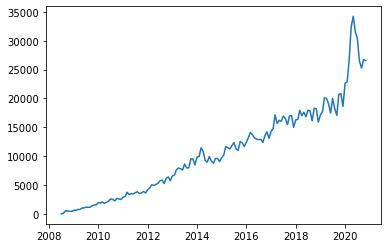

In [40]:
# '.index' is the horizontal data
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.show()

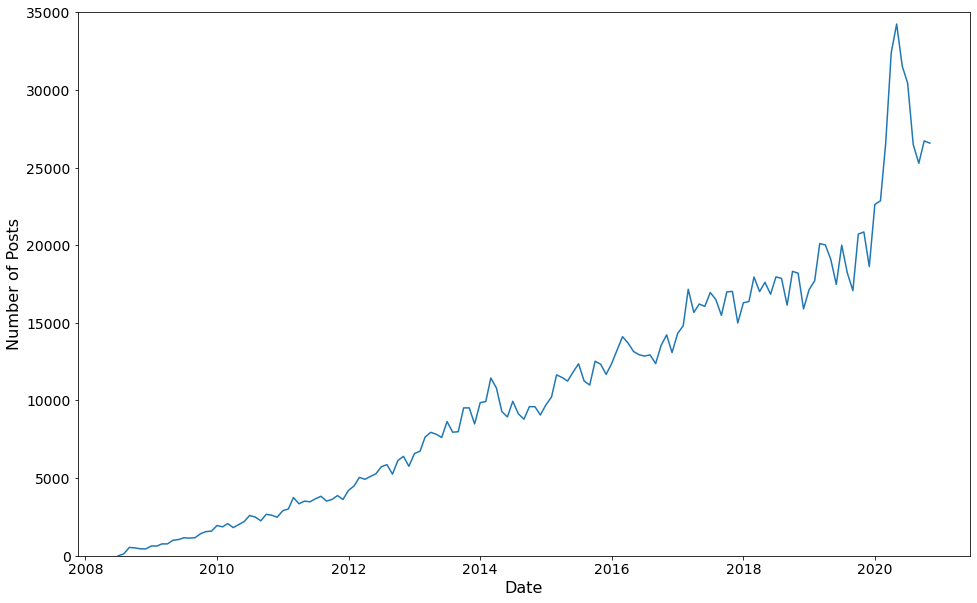

In [41]:
plt.figure(figsize=(16, 10))  # Make chart larger
plt.xticks(fontsize=14)  # Manage the data on x scale
plt.yticks(fontsize=14)  # Manage the data on y scale
plt.xlabel('Date', fontsize=16)  # Manage the label on x axis
plt.ylabel('Number of Posts', fontsize=16)  # Manage the label on y axis
plt.ylim(0, 35000)  # Set limits on y axis
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.show()

**Challenge**: <br>
Show multiple lines (e.g. all languages) on the same chart.

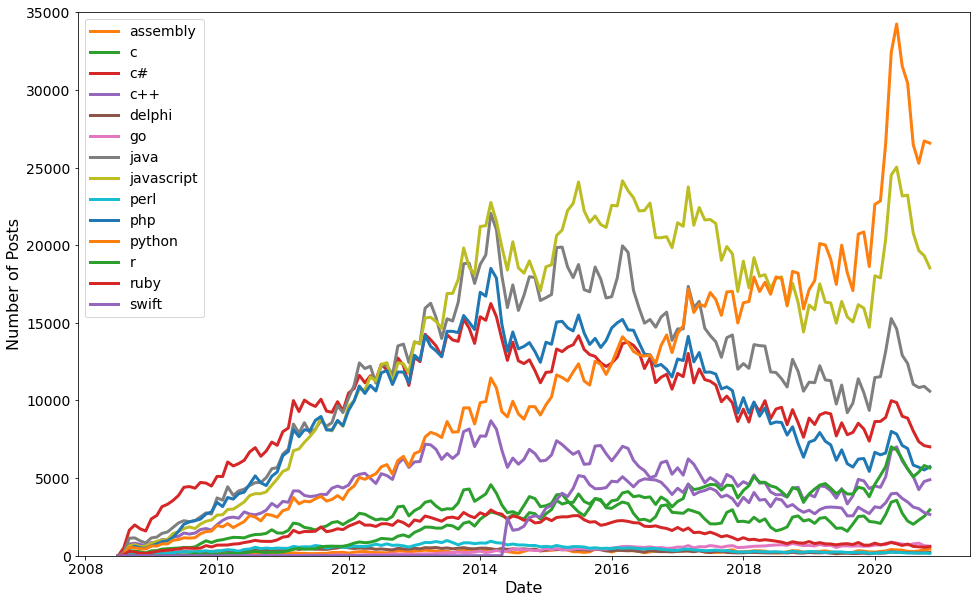

In [42]:
plt.figure(figsize=(16, 10))  # Make chart larger
plt.xticks(fontsize=14)  # Manage the data on x scale
plt.yticks(fontsize=14)  # Manage the data on y scale
plt.xlabel('Date', fontsize=16)  # Manage the label on x axis
plt.ylabel('Number of Posts', fontsize=16)  # Manage the label on y axis
plt.ylim(0, 35000)  # Set limits on y axis
plt.plot(reshaped_df.index, reshaped_df['python'])

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=column)

plt.legend(fontsize=14)
plt.show()

## Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes.
To better see a trend we can plot an average of, say 6 or 12 observations.
This is called the rolling mean. We calculate the average in a window of time
and move it forward by one observation.
Pandas has two handy methods already built in to work this out: <br>
[rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)
and <br>
[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [43]:
roll_df = reshaped_df.rolling(window=6).mean()  # Try using 'windows=3' (9, 12)
roll_df.fillna(0, inplace=True)

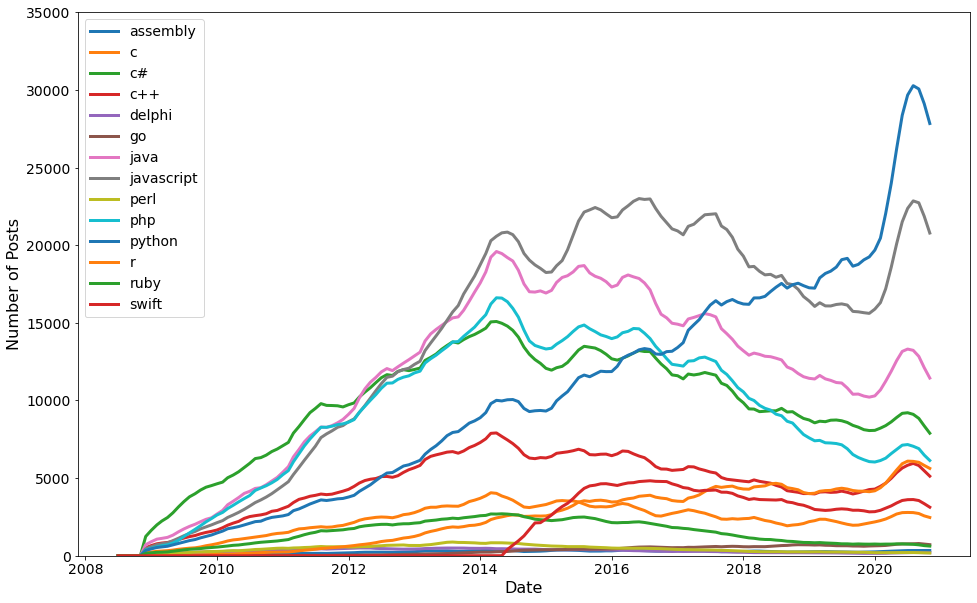

In [44]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)

plt.legend(fontsize=14)
plt.show()
